In [11]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
X, y = wage(return_X_y=True)
X

array([[2.006e+03, 1.800e+01, 0.000e+00],
       [2.004e+03, 2.400e+01, 3.000e+00],
       [2.003e+03, 4.500e+01, 2.000e+00],
       ...,
       [2.005e+03, 2.700e+01, 0.000e+00],
       [2.005e+03, 2.700e+01, 2.000e+00],
       [2.009e+03, 5.500e+01, 1.000e+00]])

In [ ]:
gam = LinearGAM(s(0) + s(1) + f(2))

## Step 1. Default grid-search (one common lam)

In [6]:
gam.gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2) + intercept, 
   tol=0.0001, verbose=False)

In [7]:
gam.lam

[[15.848931924611142], [15.848931924611142], [15.848931924611142]]

In [8]:
def plot():
    ## plotting
    plt.figure();
    fig, axs = plt.subplots(1,3);

    titles = ['year', 'age', 'education']
    for i, ax in enumerate(axs):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        if i == 0:
            ax.set_ylim(-30,30)
        ax.set_title(titles[i]);

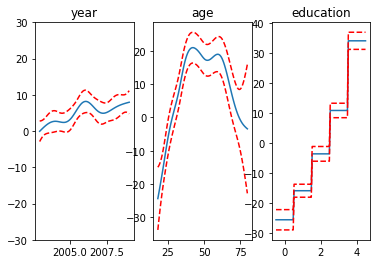

In [9]:
plot()

## Step 2. Different lam value for each feature

In [14]:
gam.gridsearch(X, y, lam=[np.logspace(-3, 3, 11)]*3)

100% (1331 of 1331) |####################| Elapsed Time: 0:01:20 Time:  0:01:20


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2) + intercept, 
   tol=0.0001, verbose=False)

In [17]:
gam.lam

[[1000.0], [251.18864315095772], [3.981071705534969]]

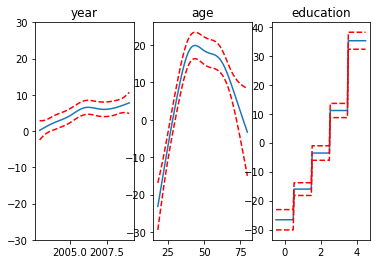

In [19]:
plot()

## Predefined lam value for each feature

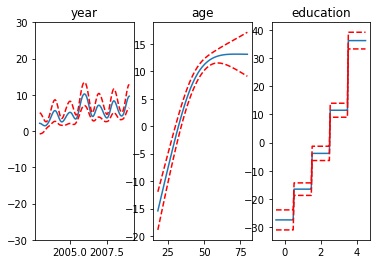

In [25]:
gam = LinearGAM(s(0) + s(1) + f(2), lam=[0, 20000, 3]).fit(X, y)
plot()